# Evaluación 4: Análisis de Regresión

## Regresión Múltiple

> Requiere cargar el archivo ["Fertilidad.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/Fertilidad.sav) en el repositorio local.

En esta sección vamos a trabajar con los datos de una investigación sobre madre primerizas. El objetivo es identificar variables psicológicas que puedan estar relacionadas a la edad a la que las mujeres evaluadas tienen su primer hijo. Cuentas con las siguientes variables: 

- Habitos: Hábitos de estudio
- Maternidad: Actitud hacia la maternidad
- Edad: Edad a la que tuvo el primer hijo

In [ ]:
!pip install pingouin
!pip install pyreadstat
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/Evaluaciones/Fertilidad.sav

In [1]:
import pandas as pd
from sklearn.covariance import MinCovDet
import numpy as np
from sklearn.preprocessing import StandardScaler

# Carga de datos
df = pd.read_spss("Fertilidad.sav")
df.drop(columns=["Sujeto"], inplace=True)

# Pre-procesamiento para eliminar casos extremos
robust_cov = MinCovDet().fit(df)
D2 = robust_cov.mahalanobis(df)
D2_df = D2 / df.shape[1]
to_drop = np.where(D2_df > 2.5)
df.drop(*to_drop, inplace=True)

# Estandarización de datos
df.drop(columns=["Autonomia"], inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df

,Habitos,Maternidad,Edad
0,0.700629,1.115464,1.698718
1,0.447094,-1.362922,0.353056
2,0.447094,0.053299,0.083923
3,0.447094,-0.654812,1.160453
4,0.447094,0.053299,-0.454342
...,...,...,...
88,-1.074116,0.407354,-0.992607
89,-1.074116,1.823575,-1.261740
90,-1.074116,-0.300757,0.353056
91,-1.074116,0.761409,-0.185210


Considera el siguiente modelo de regresión múltiple:

$$ Y_{Edad} = X_{Habitos} + X_{Maternidad} $$

1. Evalúa el supuesto de linealidad de manera gŕafica e inferencial. ¿Qué puedes concluir? (1 pt)

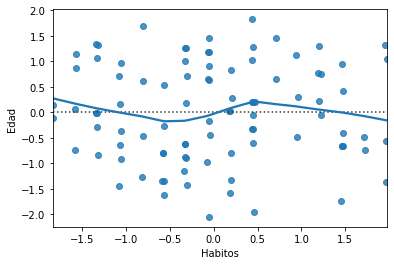

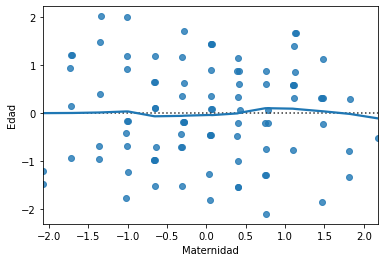

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
sns.residplot(
    x="Habitos", y="Edad", x_partial="Maternidad", data=df, lowess=True
)
plt.xlabel("Habitos")
plt.figure(2)
sns.residplot(
    x="Maternidad", y="Edad", x_partial="Habitos", data=df, lowess=True
)
plt.xlabel("Maternidad")
plt.show()

In [4]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Fit regression model
model = smf.ols("Edad ~ Habitos + Maternidad", data=df).fit()

# Inspect linearity
name = ["t value", "p value"]
test = sms.linear_harvey_collier(model)
list(zip(name, test))

[('t value', -0.29088817646057874), ('p value', 0.7718136418602499)]

Gráficamente podemos apreciar ligeras desviaciones en la linealidad de los residuos. La prueba de Harvey Collier indica que podemos asumir la linealidad de los residuos.

2. Evalúa el supuesto de homocedasticidad con al menos una prueba inferencial. ¿Qué puedes concluir? (1 pt)

In [5]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 1.1646904766874546), ('p-value', 0.30821618297131326)]

La prueba de Goldfeld Quant indica que no podemos descartar que las varianzas de los residuos son homogéneas.

3. Evalúa gráfica e inferencialmente el supuesto de normalidad. ¿Qué puedes concluir? (1 pt)

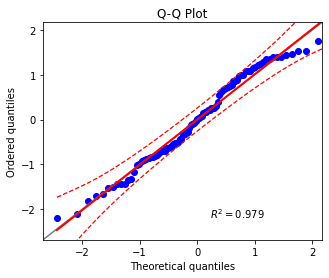

/home/renato/.virtualenvs/stats/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [6]:
import pingouin as pg

pg.qqplot(model.resid)
plt.show()

In [7]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 3.411036890611706),
 ('Chi^2 two-tail prob.', 0.18167817155969412),
 ('Skew', -0.0883307453806871),
 ('Kurtosis', 2.078556403052277)]

Gráfica e inferencialmente no podemos descartar que los residuos están distribuidos normalmente. 

4. Examina la significancia estadística del modelo y el coeficiente de determinación. ¿Qué puedes concluir? (1 pt)

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Edad   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     5.446
Date:                Thu, 10 Nov 2022   Prob (F-statistic):            0.00585
Time:                        15:20:13   Log-Likelihood:                -126.65
No. Observations:                  93   AIC:                             259.3
Df Residuals:                      90   BIC:                             266.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.839e-16      0.100   1.85e-15      1.000      -0.198       0.198
Habitos        0.3274      0.100      3.289      0.001       0.130       0.525
Maternidad     0.0307      0.100      0.308      0.759      -0.167       0.228
==============================================================================
Omnibus:                        9.189   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.411
Skew:                          -0.088   Prob(JB):                        0.182
Kurtosis:                       2.079   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo de regresión es significativo (coeficiente de determinación diferente de 0) y explica tan solo el 9% de la varianza. 

5. Examina la significancia, magnitud y signo de los coeficientes de regresión. ¿Qué puedes concluir? (1 pt)

Habitos cuenta con un coeficiente de regresión estadísticamente significativo y contribuye a explicar el 30% de la varianza explicada por el modelo. Esto quiere decir que a un puntaje mayor en hábitos de estudios, la edad a la que las mujeres de esta muestra tienen hijos aumenta. Por otra parte, Maternidad no cuenta con un coeficiente de regresión estadísticamente significativo. El modelo podría simplificarse para contar solo con un predictor. 

## MANOVA

En esta sección vamos a trabajar con datos de trabajadores y sus resultados laborales. Cuenta con las siguientes variables:

- type: Tipo de ocupación. (prof: professional and managerial; wc: white-collar; bc: bluecollar).
- income: coeficiente de ingreso
- education: coeficiente de logro educativo
- prestige: coeficiente de prestigio ocupacional

Dale un primer vistazo a los datos:

In [9]:
duncan_data = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Duncan.txt",
    sep=r"\s{1,}",
    engine="python",
)
duncan_data.reset_index(drop=True, inplace=True)
duncan_data

,type,income,education,prestige
0,prof,62,86,82
1,prof,72,76,83
2,prof,75,92,90
3,prof,55,90,76
4,prof,64,86,90
5,prof,21,84,87
6,prof,64,93,93
7,prof,80,100,90
8,wc,67,87,52
9,prof,72,86,88


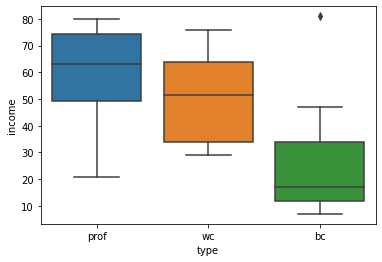

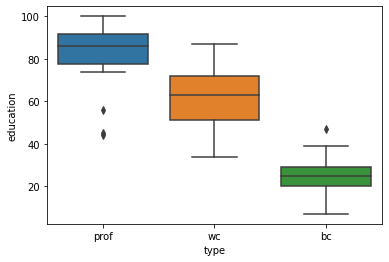

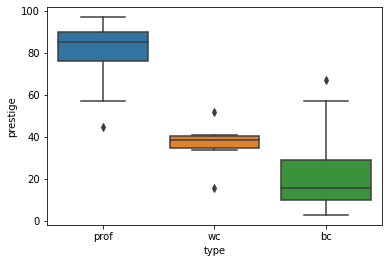

In [17]:
dep_vars = ["income", "education", "prestige"]
ind_vars = ["type"]

# Generate plots
for i in range(len(dep_vars)):
    dvar = dep_vars[i]
    plt.figure(i)
    ax = sns.boxplot(x="type", y=dvar, data=duncan_data)
plt.show()

Ahora, te corresponde evaluar el siguiente modelo MANOVA:

$$ Y_{income} + Y_{education} + Y_{prestige} = X_{type} $$

6. Evalúa los supuestos de normalidad y homocedasticidad multivariante de las variables dependientes. ¿Qué puedes concluir?  (1 pt)

In [11]:
import pingouin as pg

# Compute multivariate normality
pg.multivariate_normality(duncan_data[dep_vars])

HZResults(hz=29.908582994874525, pval=4.457277272490197e-68, normal=False)

In [12]:
# Compute univariate normality
pg.normality(duncan_data[dep_vars], method="normaltest")

,W,pval,normal
income,19.209911,6.739395e-05,False
education,43.447798,3.676466e-10,False
prestige,31.999862,1.125429e-07,False


In [13]:
from scipy.stats import kurtosis, skew

for var in dep_vars:
    print("_" * 100)
    print(var)
    print("asimetría:", skew(duncan_data[var]))
    print("curtosis:", kurtosis(duncan_data[var]))

____________________________________________________________________________________________________
income
asimetría: 0.1098681943968133
curtosis: -1.3636456578987446
____________________________________________________________________________________________________
education
asimetría: 0.22621672549010396
curtosis: -1.548248504439342
____________________________________________________________________________________________________
prestige
asimetría: 0.14158989468339175
curtosis: -1.483876485734007


In [14]:
# Compute multivariate homocedasticity
multi_homoek = pd.DataFrame()
for var in ind_vars:
    frame = pg.box_m(data=duncan_data, dvs=dep_vars, group=var)
    multi_homoek = multi_homoek.append(frame.rename(index={"box": var}))
multi_homoek

,Chi2,df,pval,equal_cov
type,18.260236,12.0,0.108014,True


El supuesto de normalidad multivariante no se cumple y a nivel univariante tampoco. Sin embargo, podemos optar por continuar con nuestro análisis debido a que la falta de normalidad no es extrema (asimetrías menores a 1 y curtosis menores a 10). 

El supuesto de homocedasticidad multivariante se cumple debido a los resultados de la prueba Box M. 

7. Ajusta el modelo MANOVA a tus datos e interpreta tus resultados. ¿Qué puedes concluir? (1 pt)

In [15]:
from statsmodels.multivariate.manova import MANOVA

maov = MANOVA.from_formula(
    "income + education + prestige ~ type", data=duncan_data
)
print(maov.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.3278 3.0000 40.0000 27.3415 0.0000
         Pillai's trace 0.6722 3.0000 40.0000 27.3415 0.0000
 Hotelling-Lawley trace 2.0506 3.0000 40.0000 27.3415 0.0000
    Roy's greatest root 2.0506 3.0000 40.0000 27.3415 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
          type          Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.0992 6.0000 80.0000 28.9933 0.0000
         Pillai's trace 1.2587 6.0000 82.0000 23.2041 0.0000
 Hotelling-Lawley trace 5.4707 6.0000 51.5

El modelo MANOVA indica un efecto principal de la variable type. Esto quiere decir que existen diferencias significativas en al menos una de las variables dependientes a partir del tipo de trabajador. 

8. Evalúa cada una de las variables dependientes por separado. ¿Qué puedes concluir? (1 pt)

In [16]:
for dep in dep_vars:
    model = smf.ols(formula=f"{dep} ~ type", data=duncan_data)
    print("_" * 100)
    print(dep)
    print(sm.stats.anova_lm(model.fit()))

____________________________________________________________________________________________________
income
            df        sum_sq      mean_sq          F        PR(>F)
type       2.0  13303.112698  6651.556349  21.542527  3.641802e-07
Residual  42.0  12968.087302   308.763983        NaN           NaN
____________________________________________________________________________________________________
education
            df        sum_sq       mean_sq          F        PR(>F)
type       2.0  30948.944444  15474.472222  81.016496  3.841729e-15
Residual  42.0   8022.166667    191.003968        NaN           NaN
____________________________________________________________________________________________________
prestige
            df        sum_sq       mean_sq          F        PR(>F)
type       2.0  33090.057143  16545.028571  65.570698  1.207302e-13
Residual  42.0  10597.587302    252.323507        NaN           NaN


Encontramos un efecto principal de la variable type en cada una de las variables dependientes por separado. El tipo de trabajador influiría en los coeficientes de educación, prestigio e ingresos. 